In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

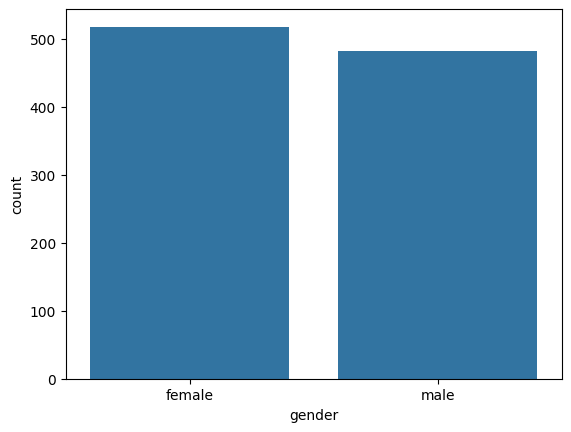

In [3]:
ax = sns.countplot(x="gender", data=df)

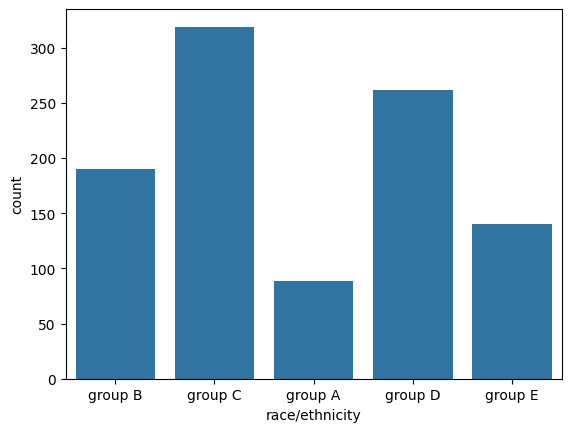

In [4]:
ax = sns.countplot(x="race/ethnicity", data=df)

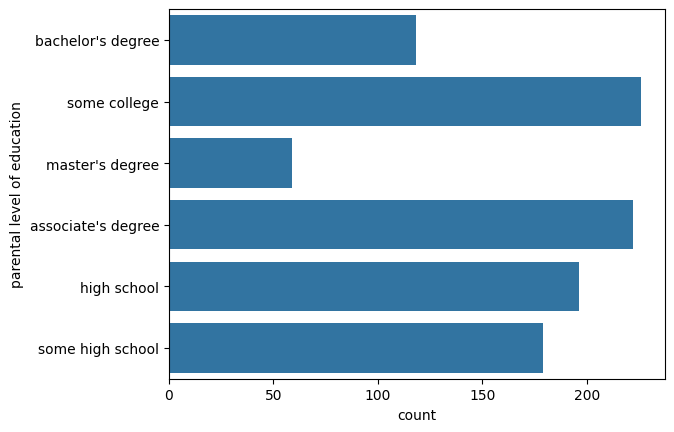

In [5]:
ax = sns.countplot(y="parental level of education", data=df)

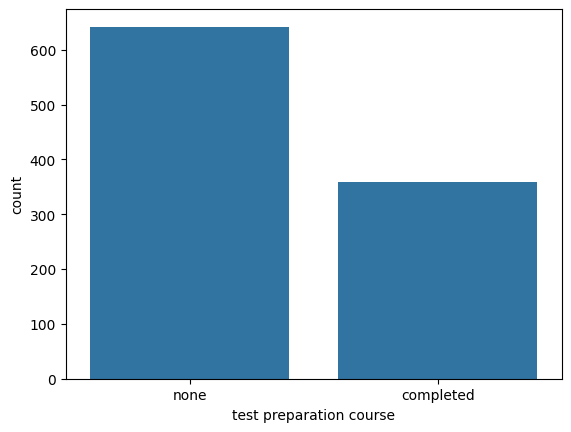

In [6]:
ax = sns.countplot(x="test preparation course", data=df)

<ipython-input-7-49a775de1fd4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["math score"]);


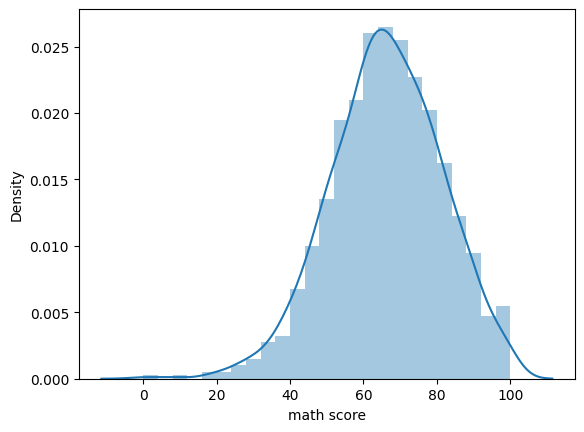

In [7]:
ax = sns.distplot(df["math score"]);

In [8]:
df["math grade"] = ""
df.loc[(df["math score"] >= 60), "math grade"] = "Pass"
df.loc[(df["math score"] < 60), "math grade"] = "Fail"
df.drop(columns=['math score', 'reading score', 'writing score'], inplace=True)
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course math grade  
0                    none       Pass  
1               completed       Pass  
2                    none       Pass  
3                    none       Fail  
4                    none       Pass

In [9]:
one_hot = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)
df = df.join(one_hot)

In [10]:
one_hot = pd.get_dummies(df['race/ethnicity'], prefix='race/ethnicity', drop_first=True)
df = df.join(one_hot)

In [11]:
one_hot = pd.get_dummies(df['parental level of education'], prefix='parental level of education', drop_first=True)
df = df.join(one_hot)

In [12]:
one_hot = pd.get_dummies(df['lunch'], prefix='lunch', drop_first=True)
df = df.join(one_hot)

In [13]:
one_hot = pd.get_dummies(df['test preparation course'], prefix='test preparation course', drop_first=True)
df = df.join(one_hot)

In [14]:
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course math grade  gender_male  race/ethnicity_group B  \
0                      none       Pass            0                       1   
1                 completed       Pass            0                       0   
2                      none       Pass            0                       1   
3                      none       Fail            1                       0   
4                      none       Pass            1                       0   
..                      ...        ...          ...                     ...   
995               completed       Pass            0                       0   
996                    none       Pass            1                       0   
997               completed       Fail            0                       0   
998               completed       Pass            0                       0   
999                    none       Pass            0                       0   

     race/ethnicity_group C  race/ethnicity_group D  race/ethnicity_group E  \
0                         0                       0                       0   
1                         1                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         1                       0                       0   
..                      ...                     ...                     ...   
995                       0                       0                       1   
996                       1                       0                       0   
997                       1                       0                       0   
998                       0                       1                       0   
999                       0                       1                       0   

     parental level of education_bachelor's degree  \
0                                                1   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
995                                              0   
996                                              0   
997                                              0   
998                                              0   
999                                              0   

     parental level of education_high school  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        1   
997                                        1   
998                                        0   
999                                        0   

     parental le

In [15]:
# Assuming your DataFrame is named 'df'
columns_to_drop = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Drop the unnecessary columns
df = df.drop(columns=columns_to_drop)

print(df)

    math grade  gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0         Pass            0                       1                       0   
1         Pass            0                       0                       1   
2         Pass            0                       1                       0   
3         Fail            1                       0                       0   
4         Pass            1                       0                       1   
..         ...          ...                     ...                     ...   
995       Pass            0                       0                       0   
996       Pass            1                       0                       1   
997       Fail            0                       0                       1   
998       Pass            0                       0                       0   
999       Pass            0                       0                       0   

     race/ethnicity_group D  race/ethnicity_group E

In [16]:
df

math grade  gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0         Pass            0                       1                       0   
1         Pass            0                       0                       1   
2         Pass            0                       1                       0   
3         Fail            1                       0                       0   
4         Pass            1                       0                       1   
..         ...          ...                     ...                     ...   
995       Pass            0                       0                       0   
996       Pass            1                       0                       1   
997       Fail            0                       0                       1   
998       Pass            0                       0                       0   
999       Pass            0                       0                       0   

     race/ethnicity_group D  race/ethnicity_group E  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   
..                      ...                     ...   
995                       0                       1   
996                       0                       0   
997                       0                       0   
998                       1                       0   
999                       1                       0   

     parental level of education_bachelor's degree  \
0                                                1   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
995                                              0   
996                                              0   
997                                              0   
998                                              0   
999                                              0   

     parental level of education_high school  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        1   
997                                        1   
998                                        0   
999                                        0   

     parental level of education_master's degree  \
0                                              0   
1                                              0   
2                                              1   
3                                              0   
4                                              0   
..                                           ...   
995                                            1   
996                                            0   
997                                            0   
998                                            0   
999                                            0   

     parental level of education_some college  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           1   
..                                        ...   
995                                         0   
996                                         0   
997                                         0   
998                                         1   
999 

In [17]:
X = df.drop(['math grade'], axis=1)
y = df['math grade']

In [18]:
X

gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0              0                       1                       0   
1              0                       0                       1   
2              0                       1                       0   
3              1                       0                       0   
4              1                       0                       1   
..           ...                     ...                     ...   
995            0                       0                       0   
996            1                       0                       1   
997            0                       0                       1   
998            0                       0                       0   
999            0                       0                       0   

     race/ethnicity_group D  race/ethnicity_group E  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   
..                      ...                     ...   
995                       0                       1   
996                       0                       0   
997                       0                       0   
998                       1                       0   
999                       1                       0   

     parental level of education_bachelor's degree  \
0                                                1   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
995                                              0   
996                                              0   
997                                              0   
998                                              0   
999                                              0   

     parental level of education_high school  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        1   
997                                        1   
998                                        0   
999                                        0   

     parental level of education_master's degree  \
0                                              0   
1                                              0   
2                                              1   
3                                              0   
4                                              0   
..                                           ...   
995                                            1   
996                                            0   
997                                            0   
998                                            0   
999                                            0   

     parental level of education_some college  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           1   
..                                        ...   
995                                         0   
996                                         0   
997                                         0   
998                                         1   
999                                         1   

     parental level of education_some high school  lunch_standard  \
0                 

In [19]:
y

0      Pass
1      Pass
2      Pass
3      Fail
4      Pass
       ... 
995    Pass
996    Pass
997    Fail
998    Pass
999    Pass
Name: math grade, Length: 1000, dtype: object

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(criterion='gini', splitter='best',
                              max_depth=None, min_samples_split=2,
                              min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                              max_features=None, random_state=None,
                              max_leaf_nodes=None, min_impurity_decrease=0.0,
                              class_weight=None
                            )
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.565


In [24]:

a = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['prediction/fail', 'prediction/pass'], index=['actual/fail', 'actual/pass'])
print("Confusion Matrix:")
print(a)

Confusion Matrix:
             prediction/fail  prediction/pass
actual/fail               26               44
actual/pass               43               87


In [25]:
print("Classification Report:")
print("")
print(classification_report(y_test,y_pred))

Classification Report:

              precision    recall  f1-score   support

        Fail       0.38      0.37      0.37        70
        Pass       0.66      0.67      0.67       130

    accuracy                           0.56       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.56      0.56      0.56       200



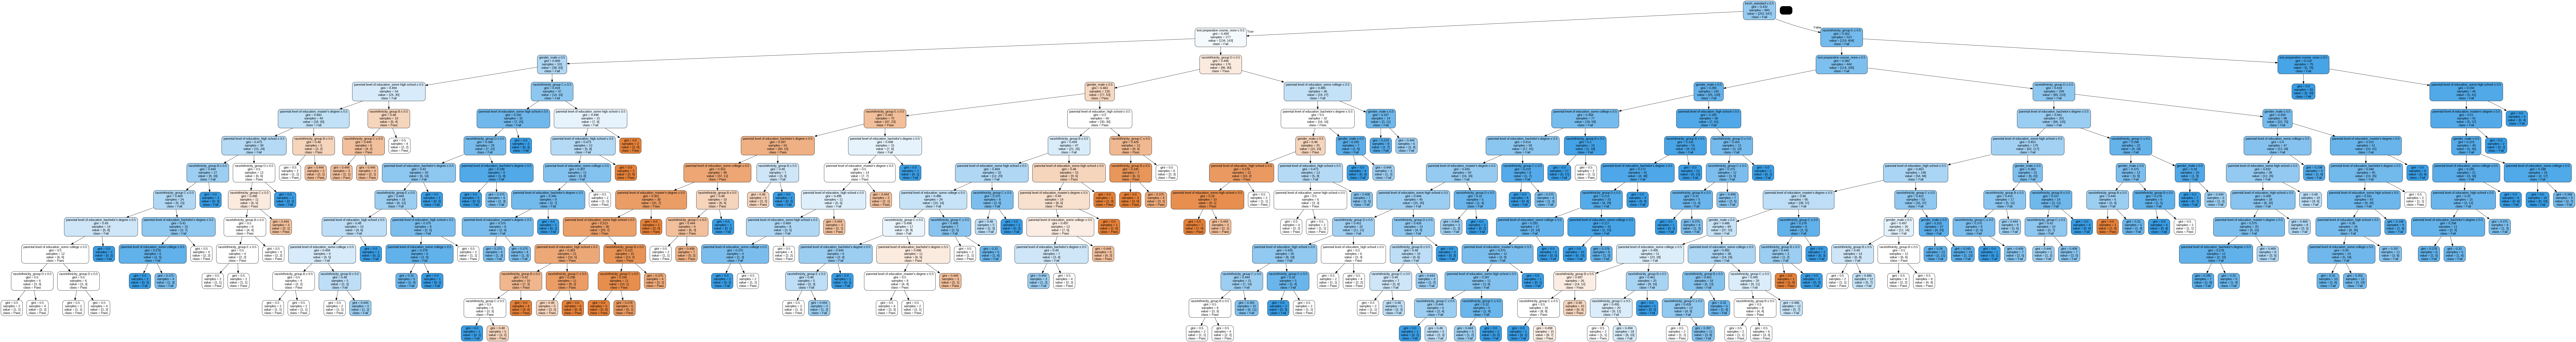

In [26]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Export the decision tree to a DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=y.unique(),
                           filled=True, rounded=True,
                           special_characters=True)

# Convert the DOT file to a PNG image
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

# Display the PNG image
Image(graph.create_png())